In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv('/kaggle/input/task04/twitter_training.csv')

In [5]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
col_names=['ID','Entity','Sentiments','Contest']
df=pd.read_csv('/kaggle/input/task04/twitter_training.csv', names=col_names)

In [10]:
df.shape

(74682, 4)

In [11]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [12]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [15]:
df.duplicated().sum()

2340

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [17]:
df.shape

(71656, 4)

In [18]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['ID', 'Topic', 'Sentiment', 'Text']
df = pd.read_csv('/kaggle/input/task04/twitter_training.csv', header=None, names=column_names, encoding='latin1')

df.dropna(subset=['Text'], inplace=True)

print("--- Data Summary ---")
print(f"Total rows after cleaning: {len(df)}")
print("\nUnique Sentiment Values:")
print(df['Sentiment'].unique())
print("\nTop 5 Topics by Tweet Count:")
print(df['Topic'].value_counts().nlargest(5))

--- Data Summary ---
Total rows after cleaning: 73996

Unique Sentiment Values:
['Positive' 'Neutral' 'Negative' 'Irrelevant']

Top 5 Topics by Tweet Count:
Topic
MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Name: count, dtype: int64


In [20]:
palette_map = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray', 'Irrelevant': 'lightcoral'}

plt.figure(figsize=(8, 6))

sns.countplot(
    x='Sentiment',
    data=df,
    order=df['Sentiment'].value_counts().index,
    palette=[palette_map[s] for s in df['Sentiment'].value_counts().index]
)

plt.title('Overall Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.savefig('sentiment_distribution.png')
plt.close()

# Print counts
print("Overall Sentiment Counts:")
print(df['Sentiment'].value_counts())

Overall Sentiment Counts:
Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


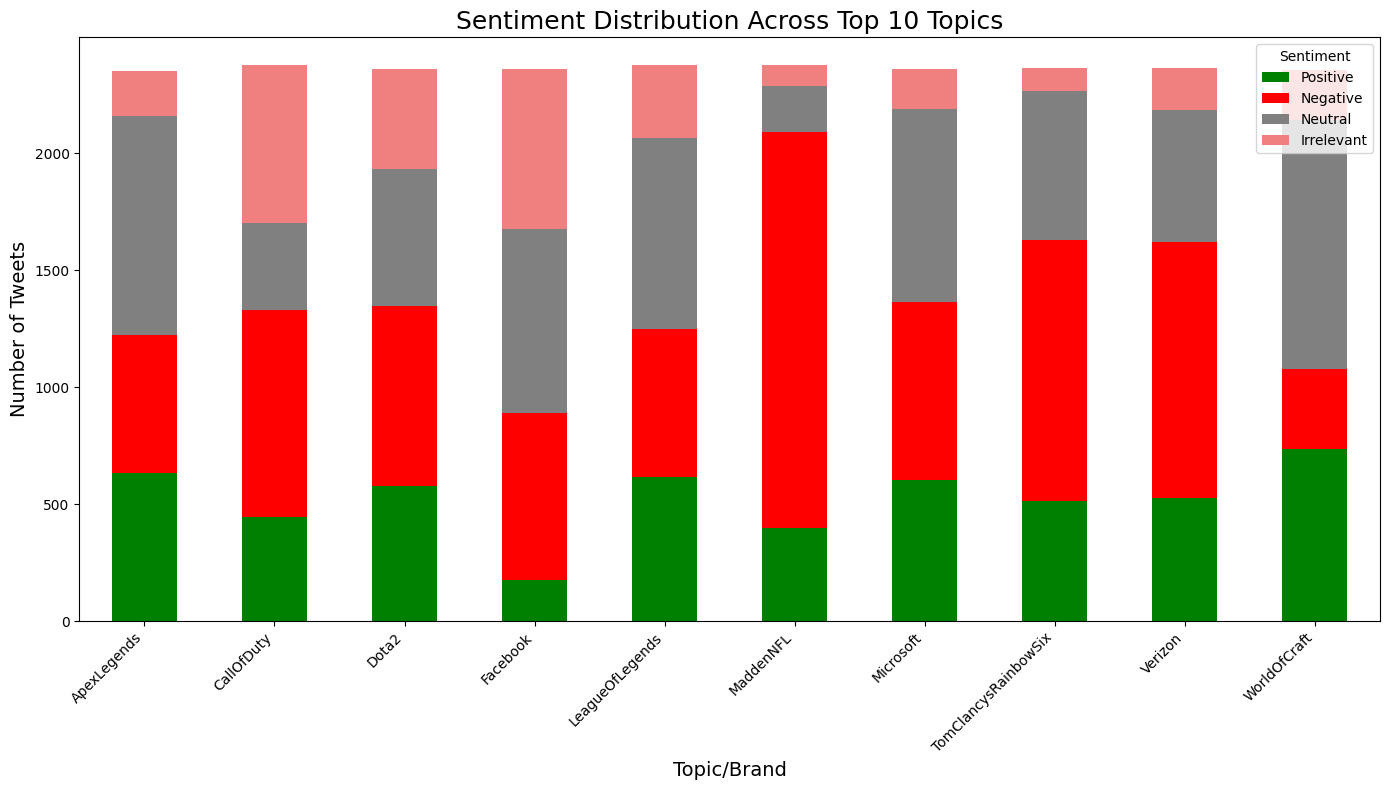

In [21]:

top_10_topics = df['Topic'].value_counts().nlargest(10).index
df_top_10 = df[df['Topic'].isin(top_10_topics)]

sentiment_by_topic = df_top_10.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)

sentiment_by_topic = sentiment_by_topic[['Positive', 'Negative', 'Neutral', 'Irrelevant']]

fig, ax = plt.subplots(figsize=(14, 8))
sentiment_by_topic.plot(kind='bar', stacked=True, ax=ax, color=[palette_map[s] for s in sentiment_by_topic.columns])

plt.title('Sentiment Distribution Across Top 10 Topics', fontsize=18)
plt.xlabel('Topic/Brand', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()


(-1.099998012111337,
 1.0999775345959826,
 -1.0999998478039628,
 1.0999999927525697)

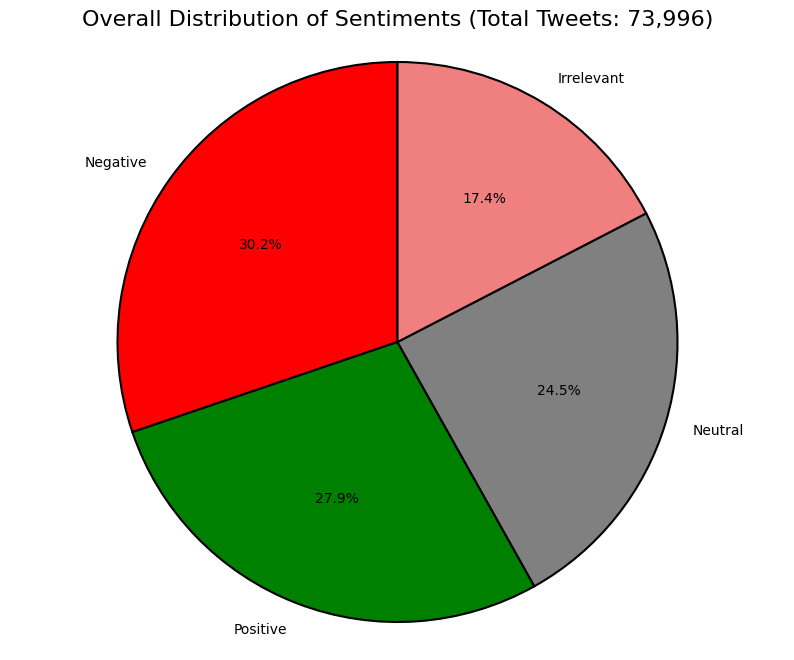

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['ID', 'Topic', 'Sentiment', 'Text']

df = pd.read_csv('/kaggle/input/task04/twitter_training.csv', header=None, names=column_names, encoding='latin1')

df.dropna(subset=['Text'], inplace=True)

sentiment_counts = df['Sentiment'].value_counts()

palette_map = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray', 'Irrelevant': 'lightcoral'}

labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = [palette_map[s] for s in labels]

plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%', 
    startangle=90,     
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title(f'Overall Distribution of Sentiments (Total Tweets: {len(df):,})', fontsize=16)
plt.axis('equal') 


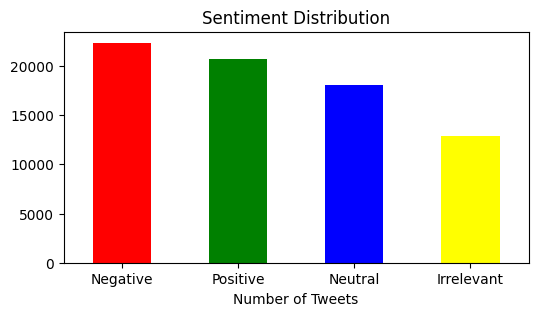

In [23]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()